Datasets with a huge number of features will make training slow, and also harder to find a solution &rarr; _curse of dimensionality_

Reducing dimensionality loses some infomartion: it may make the system perform worse, while modeling more complex. We should first try to use the original data before considering dimensionality reducion.

In some cases, however, reducing the dimensionality of the training data might filter out noise and unnecessary details and result in higher performance (but usually it won't, it will speed up training only)

It can also help with Data Visualization.

### The curse of dimensionality

The more dimensions the training set has, the greater the risk of overfitting &rarr; high-dimensional datasets are at risk of be very sparse: most training distances are likely to be far away from each other.



## Main Approaches for Dimensionality Reduction



### Projection

In real-world problems, most of the instances are not spread out uniformly accross all dimensions: some features are almost constant, other are highly correlated. This makes all datapoints tend to lie within a lower _dimensional subspace_ of the high-dimensional space.

<div>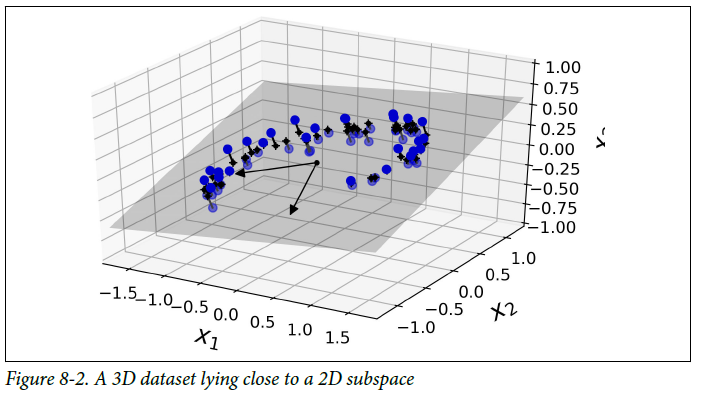</div>

### Manifold Learning

In many cases however, the data may twist and turn, so projecting it won't help.

<div>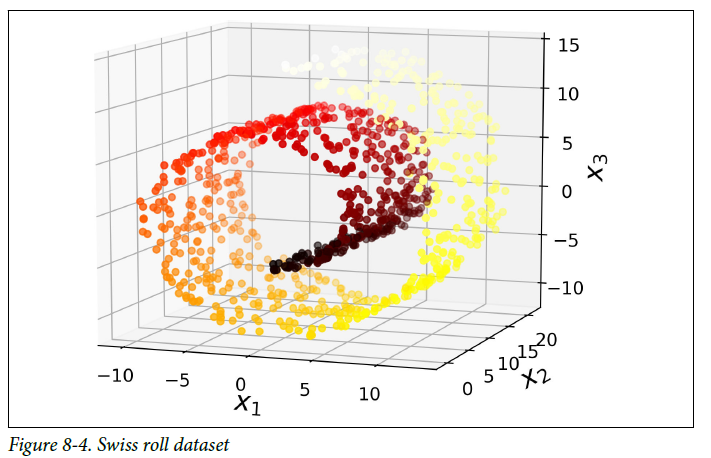</div>

A _manifold_ is a shape that can be bent and twisted in a higher-dimensional space: it is a d-dimensional part of an n-dimensional space (d<n) that resembles a d-dimensional hyperplane

<div>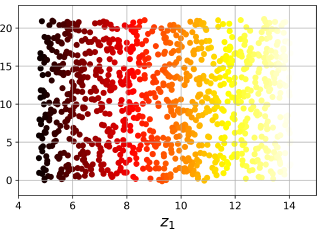</div>

# PCA

 Identifies the axis that accounts for the largest amount of variance in the training set &rarr; identifies the hyperplane that fits best to the data, then projects the data into it &rarr; minimzes mean squared distance between the original dataset and its projection onto the axis

We want to preserve variance to lose less information on the projection.



### Principal Components

How to find them? &rarr; _Singular Value Decomposition_ (SVD)

In [ ]:
from sklearn.decomposition import PCA


pca = PCA(n_components = 2)
X2D = pca.fit_transform(X)

### Explained Variance Ratio

the explained variance ratio of each principal component is given by the _explained\_variance\_ratio_ variable. It indicates the proportion of the dataset's variance that lies along the principal components.

In [ ]:
pca.explained_variance_ratio_

### Choosing the right number of dimensions

Pick the number of dimensions that add up to sufficiently large portion of the variance (95%) 

In [ ]:
#Get number of dimensions need for 95%+ of the variance
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)




We can also plot the explained variance as function of the n_dimensions:

In [ ]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)


plotting cumsum:

<div>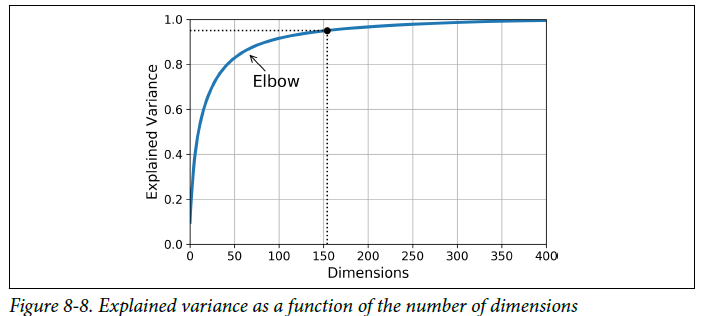</div>

### Randomized PCA

A faster approach to find an approximation of tthe first d principal components. Scikit-Learn uses an stoachstic algorithm (Randomized PCA) 

the svd\_solver is set by default to "auto": if you want to use full SVD, set to "full"

In [ ]:
rnd_pca = PCA(n_components=154, svd_solver="randomized")
X_reduced = rnd_pca.fit_transform(X_train)

### Incremental PCA

for too large datasets, PCA would be to costly, since it requires the whole training set to fit into memory to apply the algorithm.

Incremental PCA solves this by splitting the data into mini-batches and feeding it to the IPCA algorithm one mini-batch at a time.

In [ ]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_train, n_batches):
    inc_pca.partial_fit(X_batch)
    
X_reduced = inc_pca.transform(X_train)

### Kernel PCA

Good to preseve clusters of instances after projection, or unroll datasets that lie close to a twisted manifold.

In [ ]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.04)
X_reduced = rbf_pca.fit_transform(X)

<div>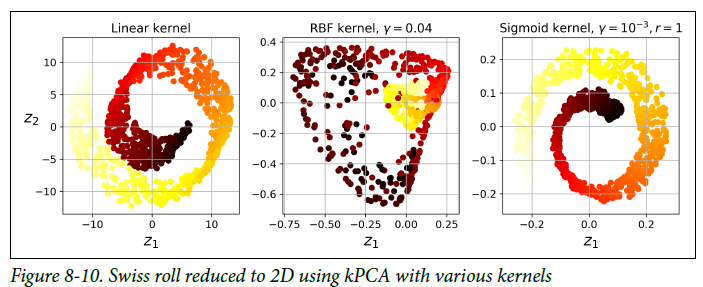</div>

#### Selectin a Kernel and Tuninig Hyperparameters

Dimensionality Reduction is often a preparation step for a supervised learning task &rarr; use grid search.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

clf = Pipeline([
        ("kpca", KernelPCA(n_components=2)),
        ("log_reg", LogisticRegression())
    ])
param_grid = [{
        "kpca__gamma": np.linspace(0.03, 0.05, 10),
        "kpca__kernel": ["rbf", "sigmoid"]
    }]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X, y)


>>> print(grid_search.best_params_)
{'kpca__gamma': 0.043333333333333335, 'kpca__kernel': 'rbf'}

#  LLE

_Locally Linear Embedding_ is another nonlinear dimensionality reduction technique &rarr; manifold technique that does not rely on projections

It measures how well each instance linearly relates with its closes neighboars, and then looks for a lower dimensional representation that preserves best this relations. &rarr; <b>good at unrolling twisted manifolds, especially when there is not too much noise.</b>

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
X_reduced = lle.fit_transform(X)

# Other Dimensionality Reduction techniques

 * Multidimensional Scaling (MDS): tries to preserve distance between instances
 
 
 * Isomap: creates a graph by connecting each instance to its nearest neighbors
 

 * t-Distributed Strochastic Neighbor Embedding (t-SNE): reduces dimensionality while trying to keep similar instances close and dissimilar ones apart &rarr; used for visualization, for clusters in high-dimensional space
 
 
 * Linear Discriminant Analysis (LDA)

# t-SNE

t-SNE finds a way to project data into a low dimensional space, so that the clustering in the high dimensional space is preserved.

We start with the original scatter plot, and put the points on the line in a random order &rarr; t-SNE will move this points bit by bit, until it has them clustered.

<div>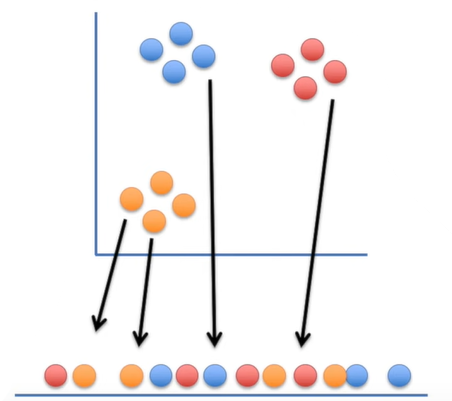</div>


We will start from the farthest point on the left

<div>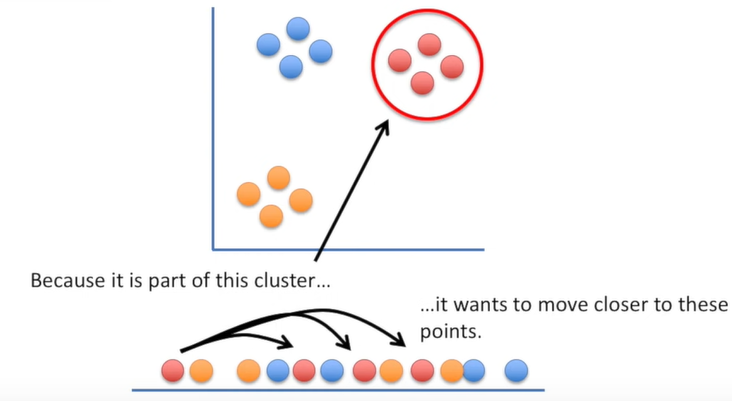</div>



At each stop, a point on the line is attracted to point it is near in the scater plot, and replled by points it is far from.

## Details

### Step 1: Determine the "similarity" of all the points in the scatter plot

<div>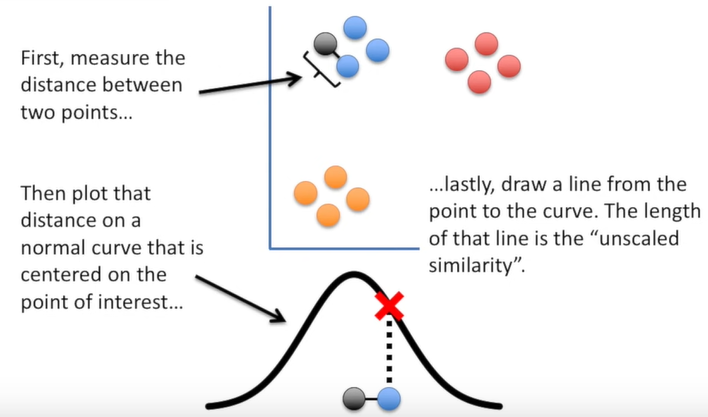</div>
<div>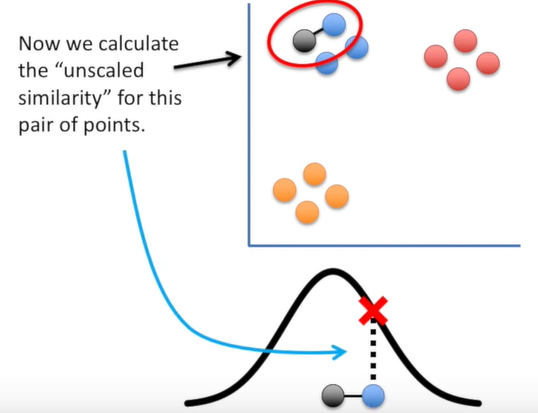</div>

We do this "unscaled similarity" calculation for every point. Sice we are using a normal distribution, distant points will have low similarity values, and close points high values

<div>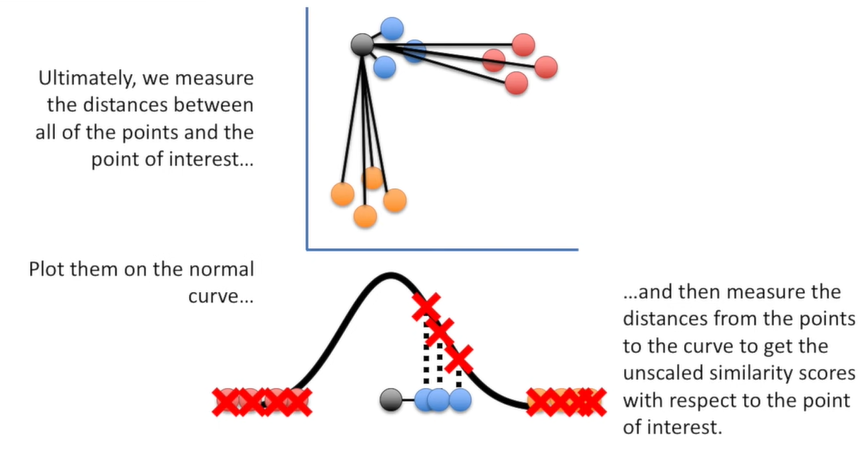</div>

Next, we scale the unsclaed similarities so they add up to 1

t-SNE has a "perplexity" parameter  equal to the expected density (density of points in a cluster), and that comes into play, but these clusters are still more "similar" than we might expect.

<div>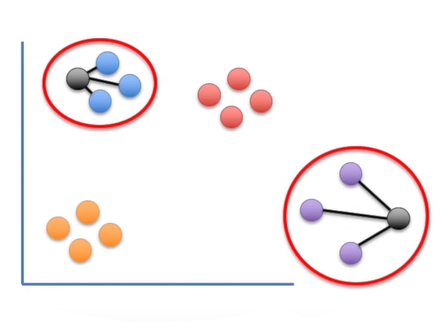</div>

Ultimately, we will end up with a matrix of similarity scores

<div>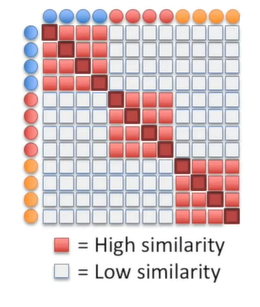</div>


### Step 2: Now we randomly project the data on the line, an calculate similarity scores for the points on the number line

<div>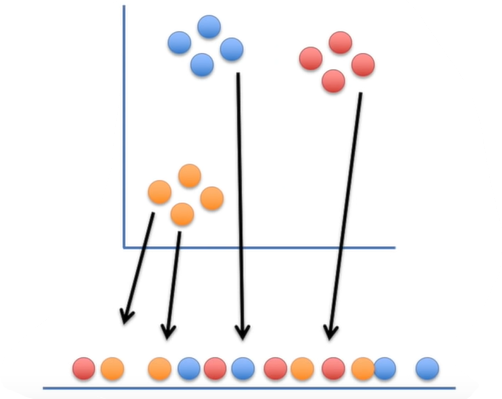</div>

Like the first step, we pick a point, measure its distance the other points, and then  drawing a line from the point to a curve. <b>However, this time we use a t-distribution</b>. By using t-distribution, the less similar pairs are penalized less heavily on the lower-dimensional embedding.

<div>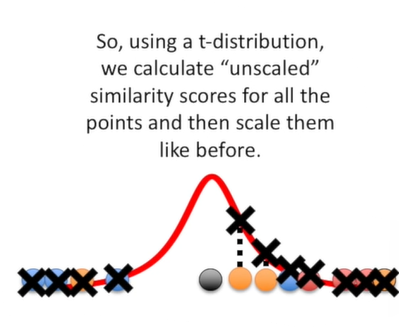</div>

And again, we end up with a matrix of similarity scores

<div>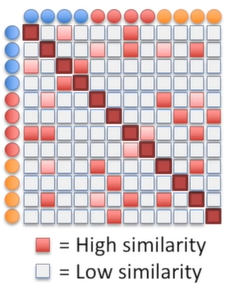</div>

<div>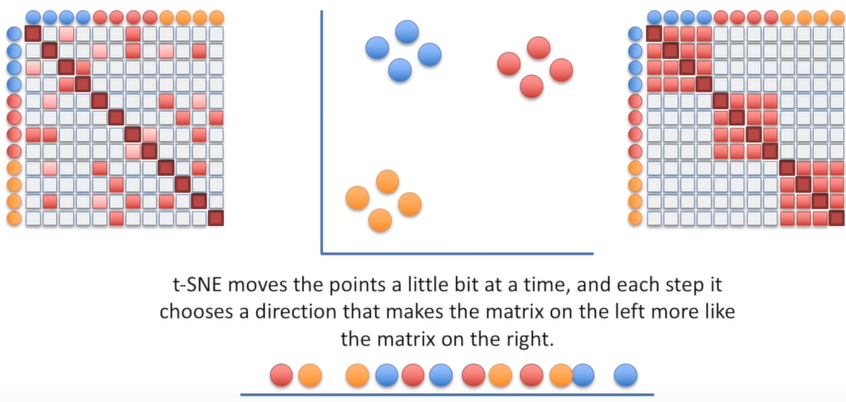</div>
